## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('data/human_body_temperature.csv')

In [53]:
df

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73
5,99.2,M,83
6,98.0,M,71
7,98.8,M,78
8,98.4,F,84
9,98.6,F,86


In [13]:
df['temperature'].mean()

98.24923076923076

In [15]:
df['temperature'].var()

0.5375575432319615

In [109]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [1]:
import matplotlib.pyplot as pltb

In [11]:
%matplotlib inline

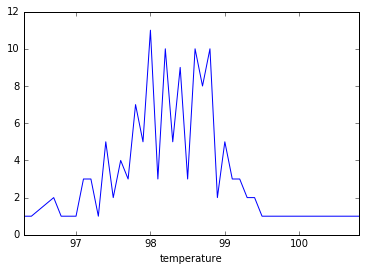

In [12]:
df.plot()

In [ ]:
#looks to be somewhat normal distribution... 
#we would expect it to be a normal distribution because people are close to the average expected body temp
#Also, there is no reason to suspect the body temps of people are not independent

In [ ]:
#Hypothesis test:
##H0, mean body temperature found in sample is accounted for by normal sampling variability
##HA, mean body temp found in sample is statistically significant (abnormal)

#We can use a z-test or a t-test, although results will be similar because the sample size is >30
##A t-test will require a higher t-score than the relative z-score to reject the null hypothesis

In [ ]:
#95% confidence interval

In [47]:
print df.mean() - 1.96 * df.std()
print df.mean() + 1.96 * df.std()

        temperature  heart_rate
gender                         
F         96.936610    58.26760
M         96.735054    61.85387
        temperature  heart_rate
gender                         
F         99.851082   90.040092
M         99.474177   84.884592


In [ ]:
#Hypothesis test:
##H0, mean body temperature difference between men and women found in sample is accounted for by normal sampling variability
##HA, mean body temp diff between men and women found in sample is statistically significant (abnormal)

In [66]:
df.sort('gender').head()

/home/fred/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,temperature,gender,heart_rate
0,99.3,F,68
84,98.6,F,85
83,99.2,F,77
80,98.8,F,73
76,98.0,F,76
99,98.0,M,74
100,99.0,M,81
19,99.4,M,70
101,98.5,M,68
94,97.8,M,58


In [6]:
m = df[df.gender == 'M']
f = df[df.gender == 'F']
mf_diff_mean = m['temperature'].mean() - f['temperature'].mean()
mf_diff_mean

-0.2892307692307696

In [11]:
df['temperature'].sem()

0.064304416837891024

In [85]:
from math import sqrt
std1 = sqrt((m['temperature'].var() / 65) + (f['temperature'].var() / 65))
std1

0.12655395041982645

In [ ]:
#95% CI

In [87]:
print mf_diff_mean - 1.96 * std1
print mf_diff_mean + 1.96 * std1

-0.537276512054
-0.0411850264079


In [ ]:
#so, we end up rejecting our null hypothesis. 
#This means there is a statistically significant (said with 95% confidence) difference in the body temps of men & women